Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person


workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset


hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual

In [ ]:
# Naive-bayes Classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
#Load the training data
sal_train=pd.read_csv('/content/SalaryData_Train.csv')
sal_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
sal_train.shape

(30161, 14)

14 columns and 30161 records in our train dataset.

In [ ]:
sal_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
#Load the test dataset
sal_test=pd.read_csv("/content/SalaryData_Test.csv")
sal_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
sal_test.shape

(15060, 14)

14 columns and 15060 records in our test dataset.

In [ ]:
sal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


We have 9 features of object data type. They have to be encoded numerical for model fitting and analysis

In [ ]:
print('Null values is training set: ',sal_train.isnull().sum())
print('Nullvalues in test data: ',sal_test.isnull().sum())

Null values is training set:  age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64
Nullvalues in test data:  age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [ ]:
print('Duplicates in Training set: ',sal_train.duplicated().sum())
print('Duplicates in test set: ',sal_test.duplicated().sum())

Duplicates in Training set:  3258
Duplicates in test set:  930


In [ ]:
#Make a copy of the dataset
train=sal_train.copy()
test=sal_test.copy()

In [ ]:
#Drop the duplicated records
train=train.drop_duplicates(keep='first',inplace=False)
test=test.drop_duplicates(keep='first',inplace=False)

In [ ]:
print(train.duplicated().sum(),test.duplicated().sum())

0 0


In [ ]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000




*   Age: The value of Age attribute varies from 17 to 90 years with an average of 39 years
*   Capital gain: For capital-gain, the mean is 1215.44 and median is 0, which indicates that the distribution is highly right skewed. It shows that either a person has no gain or has gain of very large amount(10k or 99k).

*   Capital loss: Similar to cApital gain (most of the values are centered at 0)
*  Hours per week: hpw varies within the range of 1 to 99. We can say that data is approximately symmetric







In [ ]:
train.describe(include=['O'])

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
count,26903,26903,26903,26903,26903,26903,26903,26903,26903
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,19213,8268,12371,3783,10809,22758,17961,24259,20023



*   Native-country has maximum number of unique categories i.e. 40 categories.
But the native-country is highly biased toward the US which has frequency of 24259out of total 26903(nearly 91%).
*   Occupation has more or less uniform distribution of categories as comparerd to the other attributes.

*   Race is also biased to the white race category(22758) with 85.5%.
*   The top category in workclass is Private having frequency(19213) and percentage(75.5%).






In [ ]:
train.Salary.value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


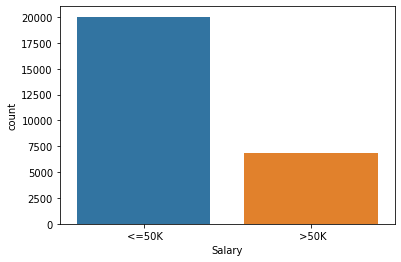

In [ ]:
#Counts of each class in Salary column
sns.countplot(train.Salary)

20023 have Salary less than or equal to 50k. Only 6880 of them earn more than 50k. Our data is imbalanced.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


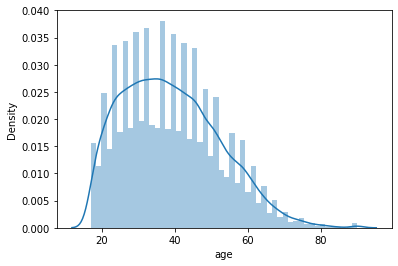

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


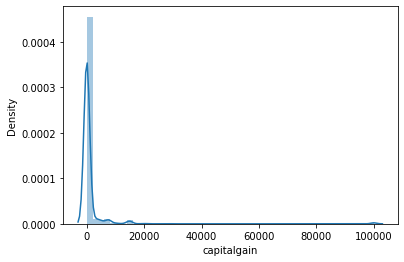

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


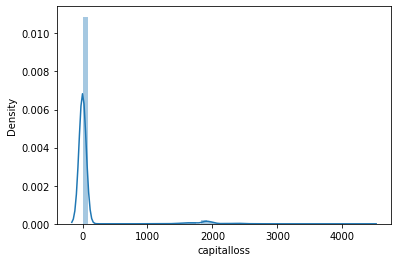

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


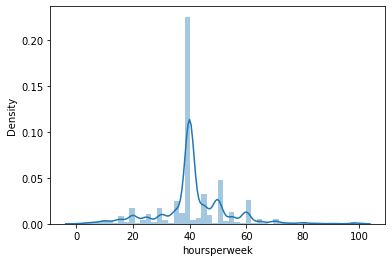

In [ ]:
for col in ['age','capitalgain','capitalloss','hoursperweek']:
  sns.distplot(train[col])
  plt.show()

Capital gain and capital loss are right skewed. Hours per week is symmetrical.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


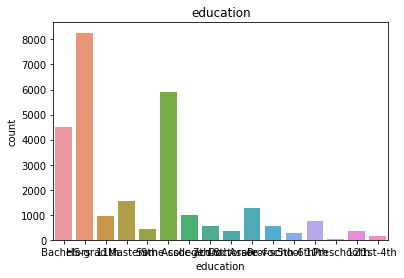

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


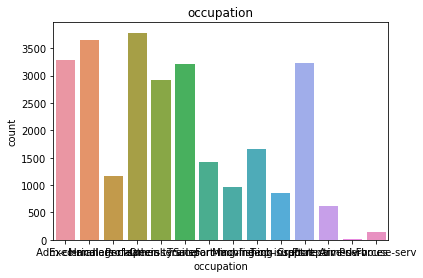

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


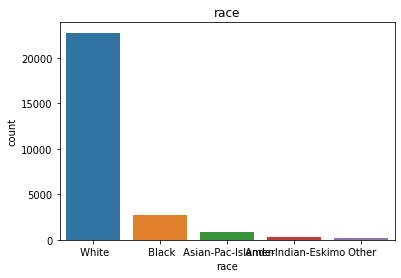

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


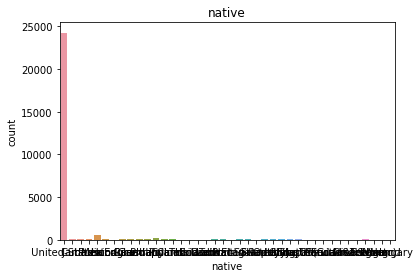

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


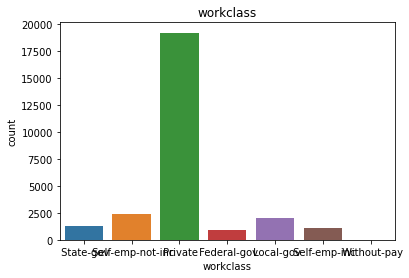

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


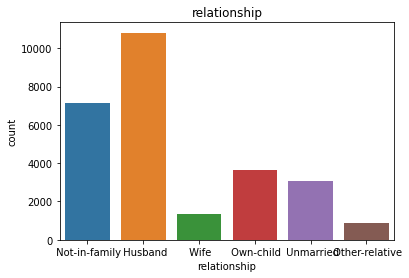

In [ ]:
for col in ['education','occupation','race','native','workclass','relationship']:
  sns.countplot(train[col])
  plt.title(col)
  plt.show()

In [ ]:
#Drop educationno column as it gives the same data as education
train=train.drop('educationno',axis=1)
test=test.drop('educationno',axis=1)

In [ ]:
#Impart a New feature capital change to reduce one column
train['capital_change']=train['capitalgain']-train['capitalloss']
test['capital_change']=test['capitalgain']-test['capitalloss']

In [ ]:
train['capital_change'].describe()

count    26903.000000
mean      1117.015760
std       7832.245134
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_change, dtype: float64

In [ ]:
#Drop capitalgain and capitalloss columns
#Drop Native column as there are many states and it is highly concentrated for United States. There will be no use if we encode these variables for model.
#Drop relationship column as maritalstatus and relationship both give us almost data
train=train.drop(columns=['capitalgain','capitalloss','native','relationship'],axis=1)
test=test.drop(columns=['capitalgain','capitalloss','native','relationship'],axis=1)

In [ ]:
train.head()

,age,workclass,education,maritalstatus,occupation,race,sex,hoursperweek,Salary,capital_change
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,<=50K,2174
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,<=50K,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,<=50K,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,<=50K,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,<=50K,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['workclass', 'maritalstatus', 'education', 'occupation', 'race', 'sex', 'Salary']
# Encode labels of multiple columns at once
train[cols] = train[cols].apply(LabelEncoder().fit_transform)
test[cols] = test[cols].apply(LabelEncoder().fit_transform)

In [ ]:
train.head()

,age,workclass,education,maritalstatus,occupation,race,sex,hoursperweek,Salary,capital_change
0,39,5,9,4,0,4,1,40,0,2174
1,50,4,9,2,3,4,1,13,0,0
2,38,2,11,0,5,4,1,40,0,0
3,53,2,1,2,5,2,1,40,0,0
4,28,2,9,2,9,2,0,40,0,0


In [ ]:
train.Salary.value_counts()

0    20023
1     6880
Name: Salary, dtype: int64

In [ ]:
X_train=train.drop('Salary',axis=1)
y_train=train['Salary']
X_test=test.drop('Salary',axis=1)
y_test=test['Salary']
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(26903, 9) (26903,) (14130, 9) (14130,)


In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

##Naive Bayes model

###Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_gb = GaussianNB()
classifier_gb.fit(X_train, y_train)
y_pred = classifier_gb.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)


Accuracy = 79.69568294409058


array([[10341,   279],
       [ 2590,   920]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
train_pred=classifier_gb.predict(X_train)
cm_train= confusion_matrix(y_train, train_pred)
print(cm_train)
train_acc=round(accuracy_score(y_train, train_pred)*100.0,3)
print('Accuracy of train dataset:{}%'.format(train_acc))

cm_test= confusion_matrix(y_test, y_pred)
print(cm_test)
test_acc=round(accuracy_score(y_test, y_pred)*100.0,3)
print('Accuracy of test dataset:{}%'.format(test_acc))

[[19423   600]
 [ 4960  1920]]
Accuracy of train dataset:79.333%
[[10341   279]
 [ 2590   920]]
Accuracy of test dataset:79.696%


In [ ]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train1=sc.fit_transform(X_train)
X_test1=sc.fit_transform(X_test)

###Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB
classifier_mb = MB()
classifier_mb.fit(X_train1, y_train)
y_pred1 = classifier_mb.predict(X_test1)
acc1 = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc1)
confusion_matrix(y_test, y_pred1)


Accuracy = 79.69568294409058


array([[10620,     0],
       [ 3510,     0]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
train_pred1=classifier_mb.predict(X_train1)
cm_train1= confusion_matrix(y_train, train_pred1)
print(cm_train1)
train_acc1=round(accuracy_score(y_train, train_pred1)*100.0,3)
print('Accuracy of train dataset:{}%'.format(train_acc1))

cm_test= confusion_matrix(y_test, y_pred)
print(cm_test)
test_acc=round(accuracy_score(y_test, y_pred)*100.0,3)
print('Accuracy of test dataset:{}%'.format(test_acc))

[[20023     0]
 [ 6880     0]]
Accuracy of train dataset:74.427%
[[10341   279]
 [ 2590   920]]
Accuracy of test dataset:79.696%


Both the models have shown good accuracy but there are many false negatives.

##Predicting new data

In [ ]:
print(classifier_gb.predict(sc.transform([[46,5,7,3,6,4,0,57,8263]])))

[1]


The data belongs to type 1 category. Means the person earns more than 50k